# ECDF of infected

In [49]:
import numpy as np
import pandas as pd
from pathlib import Path
from tqdm.notebook import tqdm
import random
from collections import defaultdict
import matplotlib.pyplot as plt
import pickle
import operator

In [8]:
import os
if os.getcwd().endswith('notebooks'):
    os.chdir(os.path.join(os.getcwd(), os.pardir))
# os.getcwd()

In [9]:
from bootstrapping import attack_rate

In [39]:
age_groups = (20, 40, 60, 80)
calc = attack_rate.AttackRate()
with (attack_rate.RESULTS_DIR / 'sampled_households_secondary_202007120108.pickle').open('rb') as handle:
    sampled_households = pickle.load(handle)
conf_intervals = calc.get_infected_confidence_interval(sampled_households, age_groups)
means = calc.get_means(sampled_households, age_groups)
known_sec_inf, unknown_age = attack_rate.get_known_secondary_infected_age_grouped(
    age_ranges=age_groups)

def age_group_to_str(age_groups, i):
    if i == 0:
        return f'0-{age_groups[i]-1}'
    if i == len(age_groups):
        return f'{age_groups[-1]}+'
    return f'{age_groups[i-1]}-{age_groups[i]-1}'
print('Age group\tLower bound\tUpper bound\t     Mean\tKnown secondary infected')
line_pattern = '{:>9s}\t{:11.0f}\t{:11.0f}\t{:>9.4f}\t{:24d}'
for i in range(len(age_groups)+1):
    print(line_pattern.format(age_group_to_str(age_groups, i), 
                              *conf_intervals[i], means[i], known_sec_inf[i]))

Age group	Lower bound	Upper bound	     Mean	Known secondary infected
     0-19	       1000	       1202	1101.9442	                     751
    20-39	       1081	       1283	1179.3691	                    1053
    40-59	        785	        950	 866.6583	                    1017
    60-79	        404	        520	 460.3566	                     588
      80+	         73	        125	  98.1602	                     139


In [44]:
age_ranges2 = list(range(1,101))

In [45]:
known_sec_inf, unknown_age = attack_rate.get_known_secondary_infected_age_grouped(
    age_ranges=age_ranges2)

In [65]:
for key in age_ranges2:
    if key not in known_sec_inf:
        known_sec_inf[key] = 0

In [66]:
known_inf = [v[1] for v in sorted(known_sec_inf.items(), key=lambda v: operator.itemgetter(0)(v))]

In [77]:
cum_sum_known_inf = np.cumsum(known_inf) / np.sum(known_inf)

In [68]:
pd.DataFrame(data={'known_inf': known_inf, 'cum_sum_known_inf': cum_sum_known_inf}).head()

,known_inf,cum_sum_known_inf
0,29,29
1,33,62
2,26,88
3,21,109
4,40,149


In [70]:
means = calc.get_means(sampled_households, age_ranges2)

In [76]:
cum_sum_means = np.cumsum(means) / np.sum(means)

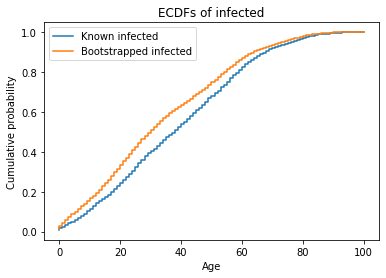

In [78]:
plt.figure()
age_ranges_full = list(range(101))
plt.step(age_ranges_full, cum_sum_known_inf, label='Known infected')
plt.step(age_ranges_full, cum_sum_means, label='Bootstrapped infected')
plt.title('ECDFs of infected')
plt.xlabel('Age')
plt.ylabel('Cumulative probability')
plt.legend()
plt.savefig(str(attack_rate.RESULTS_DIR / 'ecdf_infected.png'))
plt.show()